<a href="https://colab.research.google.com/github/NyashaNziramasanga/Masters-of-Computer-Science/blob/master/2021-Semester-2/COMP8715-heuristic-optimisation/Week4-ml-evaluation/Evaluating_Machine_Learning_InClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP2712 Evaluating Machine Learning

Evaluation in Machine Learning is very important as it is easy to lead oneself up the garden path and be overly confident in the performance of your newly developed machine learning algorithm.

Previous examples used simple train-test split.  A more systematic approach is to use Cross-Validation, for example
- k-fold validation
- leave one out validation

## Import Modules
First we need to import the neccesary modules for our machine learning extravaganza!
- [numpy](https://numpy.org/): is the fundamental package for scientific computing with Python
- [pandas](https://pandas.pydata.org/): a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- [maplotlib](https://matplotlib.org/): a comprehensive library for creating static, animated, and interactive visualizations in Python
- [seaborn](https://seaborn.pydata.org/) : Seaborn is a Python data visualization library based on matplotlib. 
- [sklearn](https://scikit-learn.org/): an open source machine learning library that supports supervised and unsupervised learning. 



In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold

#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from joblib import dump, load

## Load the UCI Iris Data
We can load the Iris dataset directly from the UCI repository.  We can use the [Pandas](https://pandas.pydata.org/) `read_csv` function to load from a URL, names the columns that are returned. Pretty neat!

`df.head()` just list the first few rows of the data that is loaded.  It is always a good sanity test to look at the data.

In [2]:
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)

# view the first few row
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


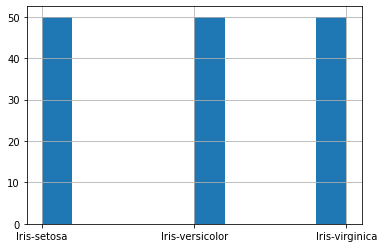

In [3]:
df['class'].hist()

This is a balanced data set as each class has the same number of instances!

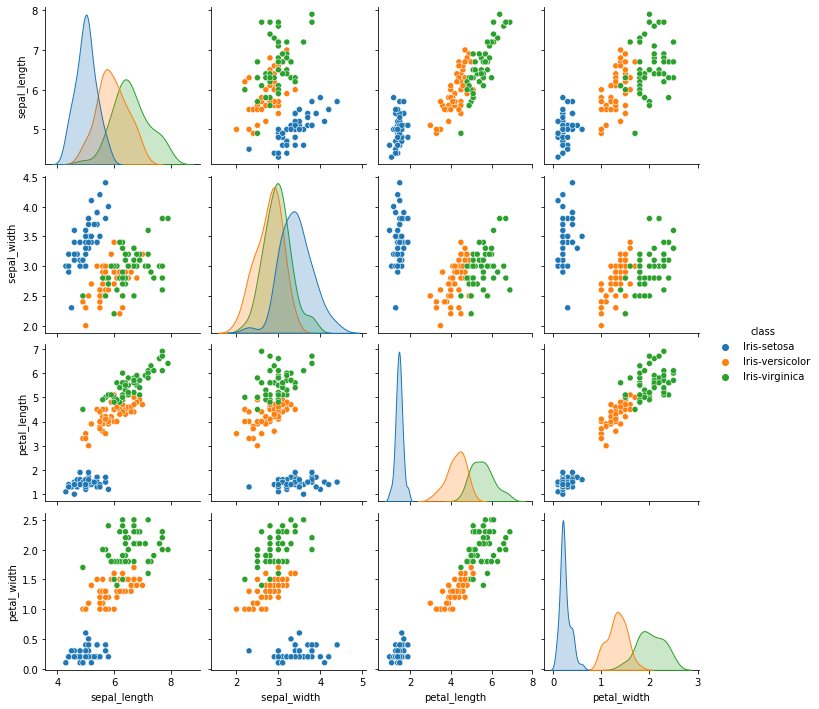

In [4]:
sns.pairplot(df,hue='class')

## Preprocess the Data

A key step in machine learning is to preprocess or massage or normalise the data to make it the best it can possibly be for the chosen machine learning algorithm.  


### Re-encode the output variable

 We need to encode our target attribute for the 
 Neural Network based classifier into *one hot format*. 
 
For categorical variables where no ordinal relationship exists, the integer encoding is not enough and we must use a one hot format.

In fact, using in integer encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added *for each unique* integer value or class.
 
We can do this by calling the Pandas method `get_dummies(y)`

In [5]:
pd.get_dummies(df['class'])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [6]:
X = df.iloc[:, 0:4].values # input attributes/features
y_oh_df = pd.get_dummies(df['class'])
class_labels = y_oh_df.columns.values
print(class_labels)
y_oh = pd.get_dummies(df['class']).values
y_oh[0:10,:]

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

Now we have a seperate column for each class with a `1` in the column when that row is for that class. 

## Generate Training and Validation Sets

This is where we start to think about how to evaluate our machine learning model, by answering the question: How do I divide my data into training and testing sets?

The scikit-learn modules provide a suite of tools for answering this very question in the [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) collection.


### K-Fold Validation
K-Fold divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible. The prediction function is learned using k-1 folds, and the fold left out is used for test.

Importantly, we want to maintain the class distribution between the training and testing splits, so we should use the Stratified K-Fold Cross-Validation

### Stratified K-Fold

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

Here is an example of stratified 3-fold cross-validation on a dataset with 100 samples from two unbalanced classes (80 0's and 20 1's). We show the number of samples in each class and compare with k-Fold.

In [7]:
nClass0 = 800 # even try a 50/50 and see what happens
nClass1 = 800 # even try a 50/50 and see what happens
eX, ey = np.ones((nClass0+nClass1, 1)), np.hstack(([0] * nClass0, [1] * nClass1))

k = 5 # change the number of folds, k, to see how the folding train/split changes the distributions

print('Standard K-Fold, [nClass0, nClass1]')
kf = KFold(n_splits=k)
for train, test in kf.split(eX, ey):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(ey[train]), np.bincount(ey[test])))
print()
print('Stratified K-Fold, [nClass0, nClass1]')
skf = StratifiedKFold(n_splits=k)
for train, test in skf.split(eX, ey):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(ey[train]), np.bincount(ey[test])))



Standard K-Fold, [nClass0, nClass1]
train -  [480 800]   |   test -  [320]
train -  [480 800]   |   test -  [320]
train -  [640 640]   |   test -  [160 160]
train -  [800 480]   |   test -  [  0 320]
train -  [800 480]   |   test -  [  0 320]

Stratified K-Fold, [nClass0, nClass1]
train -  [640 640]   |   test -  [160 160]
train -  [640 640]   |   test -  [160 160]
train -  [640 640]   |   test -  [160 160]
train -  [640 640]   |   test -  [160 160]
train -  [640 640]   |   test -  [160 160]


From this example it should hopefully be obvious that stratfication is vitally important in correctly evaluating the model.

## First train an MLP with train-test split

First, let's train with the `train_test_split` evaluation model to see what performance we get.  Run the below code block multiple times and see if the performance varies and types of errors vary.  If so, what is that?

In [8]:
# extact the train and test data for this k'th Fold
x_train, x_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.3, random_state=0, stratify=y_oh)
#x_train, x_test, y_train, y_test = X[train_index,:], X[test_index,:], y_oh[train_index,:], y_oh[test_index,:]

print(y_train.shape)
print(x_train.shape)

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)


print(y_train.shape)
print(x_train.shape)

# model initialization
hidden_layer_size = 10
max_iter = 50
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size), max_iter=max_iter, alpha=0.01, #try change hidden layer, or max_iter
                    solver='sgd', verbose=0, early_stopping=False, validation_fraction=0.2, shuffle=True, tol=0.000001) #try verbode=0 to train with out logging

# train the model
print('Training model')
h = mlp.fit(x_train,y_train)

print('training score  : {:.2f}'.format(h.score(x_train,y_train)))

# evaluate the model
y_prob = mlp.predict_proba(x_test)
y_pred = y_prob
y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

y_test_max = y_test.argmax(axis=1).astype(int)
y_pred_max = y_pred.argmax(axis=1).astype(int)

ac = accuracy_score(y_test_max,y_pred_max)
print('accuracy is {:.2f}%'.format(ac*100)) # Print accuracy score
print()
print(classification_report(y_test_max,y_pred_max)) # get summary report
print(confusion_matrix(y_test_max, y_pred_max))

(105, 3)
(105, 4)
(105, 3)
(105, 4)
Training model
training score  : 0.00
accuracy is 33.33%

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        15
           2       0.33      1.00      0.50        15

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45

[[ 0  0 15]
 [ 0  0 15]
 [ 0  0 15]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Train an MLP with k-Fold
The use of a k-Fold cross validation evaluation method should give a better indication of the generalisation performance, or the extra-sample error. 

Setting up the model is where we can change settings and evaluate the affect on performance.  You can change settings such as
- `hidden_layer_sizes`: fewer nodes means less to optimize and quicker training, but too few nodes cannot model more complex problems.  How does it go with 1, 2, 3, 5, 10, more?
- `max_iter`: the number of iterations to train for.  Too many will take too long, but too few and the MLP may stop before it converges.  What's the smallest max_iter to get 'good' performance?



In [9]:
# set up a stratified k-fold evaluation model, n_splits=5 gives us 5 folds (k = 5)
kf = StratifiedKFold(n_splits=5)

# variables to keep track of performance
foldi = 1
ac = [] # accuracy_score
cr = [] # classification_report
cm = [] # confusion_matrix

# loop over each fold of the kf
for train_index, test_index in kf.split(X,df['class']):


  # extact the train and test data for this k'th Fold
  x_train, x_test, y_train, y_test = X[train_index,:], X[test_index,:], y_oh[train_index,:], y_oh[test_index,:]



  #converting to float 32bit
  x_train = np.array(x_train).astype(np.float32)
  x_test  = np.array(x_test).astype(np.float32)
  y_train = np.array(y_train).astype(np.float32)
  y_test  = np.array(y_test).astype(np.float32)

  # model initialization
  hidden_layer_size = 10
  max_iter = 500
  mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size), max_iter=max_iter, alpha=0.01, #try change hidden layer, or max_iter
                      solver='sgd', verbose=0, early_stopping=False, validation_fraction=0.2, shuffle=True, tol=0.000001) #try verbode=0 to train with out logging

  # train the model
  print('Training model for fold {0}'.format(foldi))
  h = mlp.fit(x_train,y_train)

  print('training score  : {:.2f}'.format(h.score(x_train,y_train)))

  # evaluate the model
  y_prob = mlp.predict_proba(x_test)
  y_pred = y_prob
  y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

  y_test_max = y_test.argmax(axis=1).astype(int)
  y_pred_max = y_pred.argmax(axis=1).astype(int)

  ac.append(accuracy_score(y_test_max,y_pred_max))
  print('accuracy is {:.2f}%'.format(ac[-1]*100)) # Print accuracy score
  print()
  cr.append(classification_report(y_test_max,y_pred_max)) # get summary report
  cm.append(confusion_matrix(y_test_max, y_pred_max))
  


  foldi = foldi + 1



Training model for fold 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training score  : 0.62
accuracy is 80.00%

Training model for fold 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training score  : 0.67
accuracy is 96.67%

Training model for fold 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training score  : 0.67
accuracy is 66.67%

Training model for fold 4
training score  : 0.93
accuracy is 96.67%

Training model for fold 5
training score  : 0.02
accuracy is 33.33%



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
cm

[array([[10,  0,  0],
        [ 0,  4,  6],
        [ 0,  0, 10]]), array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  0, 10]]), array([[10,  0,  0],
        [ 0,  0, 10],
        [ 0,  0, 10]]), array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  0, 10]]), array([[ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10]])]

### Now to see how it does overall

We now need to collate the performance across the folds.  To do this we average the accuracy across all the k folds.  The standard deviation (SD) gives an idea of how the mean varies across the folds (smaller is better).

In [11]:
print('Average Accuracy: {0}% +/- {1}% SD'.format(np.round(np.mean(ac)*100,2),np.round(np.std(ac)*100,2)))

Average Accuracy: 74.67% +/- 23.53% SD


In [12]:
cm

[array([[10,  0,  0],
        [ 0,  4,  6],
        [ 0,  0, 10]]), array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  0, 10]]), array([[10,  0,  0],
        [ 0,  0, 10],
        [ 0,  0, 10]]), array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  0, 10]]), array([[ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10]])]

In [13]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

def f1score(confusion_matrix):
  precision = precision_macro_average(confusion_matrix)
  recall = recall_macro_average(confusion_matrix)
  f1 = (2 * recall * precision) / (recall + precision)
  return f1


# collating all of the confusion matricies into one equates to summing them up in the third dimension
cm_all = np.sum(np.stack(cm,axis=2),axis=2)
print(cm_all)



acc_all = np.sum(np.diag(cm_all)) / np.sum(cm_all,axis=(0, 1))
print('Overall Accuracy       : {0}%'.format(np.round(acc_all*100,2)))
precision_all = precision_macro_average(cm_all)
recall_all = recall_macro_average(cm_all)
f1_all = f1score(cm_all)
print('Overall Macro Precision: {0}%'.format(np.round(precision_all*100,2)))
print('Overall Macro Recall   : {0}%'.format(np.round(recall_all*100,2)))
print('Overall F1-Score       : {0}'.format(np.round(f1_all,2)))

for i, label in enumerate(class_labels):
  print('{0}\t precision: {1}%, recall: {2}%, f1: {3}'.format(label,np.round(precision(i,cm_all)*100,0),np.round(recall(i,cm_all)*100,0),np.round(f1score(cm_all),2)))


[[40  0 10]
 [ 0 22 28]
 [ 0  0 50]]
Overall Accuracy       : 74.67%
Overall Macro Precision: 85.61%
Overall Macro Recall   : 74.67%
Overall F1-Score       : 0.8
Iris-setosa	 precision: 100.0%, recall: 80.0%, f1: 0.8
Iris-versicolor	 precision: 100.0%, recall: 44.0%, f1: 0.8
Iris-virginica	 precision: 57.0%, recall: 100.0%, f1: 0.8


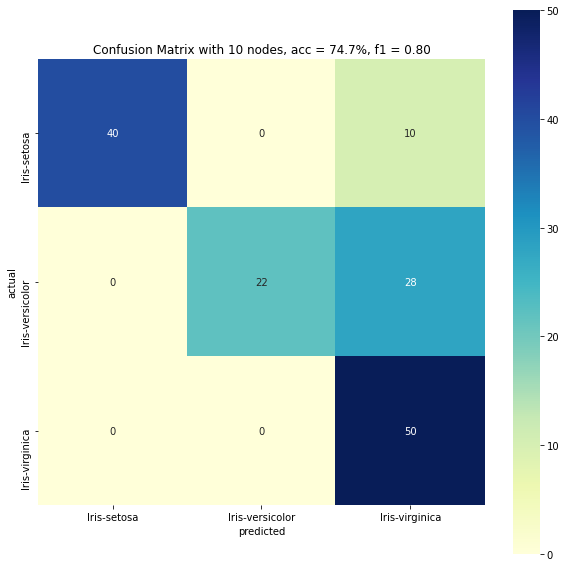

In [14]:
#df_cm = pd.DataFrame((cm_all/np.sum(cm_all,axis=1)*100), columns=class_labels, index=class_labels)
df_cm = pd.DataFrame(cm_all, columns=class_labels, index=class_labels)
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(df_cm, annot=True, ax=ax1,square=True,  cmap="YlGnBu",vmin=0,vmax=50)
ax1.set_title('Confusion Matrix with {0} nodes, acc = {1:.1f}%, f1 = {2:.2f}'.format(hidden_layer_size,acc_all*100,f1_all))
ax1.set_xlabel('predicted')
ax1.set_ylabel('actual');

## Let's Examine an a biased sample

(100,) (100,)
[[80  0]
 [19  1]]


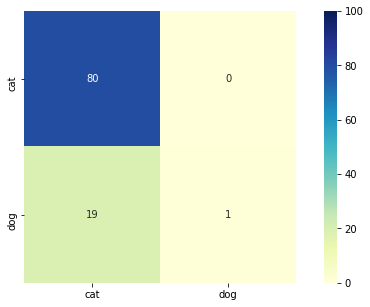

In [15]:
# 80 cats and 20 dogs
class_labels = ['cat','dog']
y_cat = [0 for i in range(0,80)]
y_dog = [1 for i in range(0,20)]


y_true = np.hstack((y_cat,y_dog))

# predict all cats except for 1
y_pred = [0 for i in range(0,99)]
y_pred = np.hstack((y_pred,[1]))

print(np.shape(y_true), np.shape(y_pred))

cm = confusion_matrix(y_true,y_pred)
print(cm)
df_cm = pd.DataFrame(cm, columns=class_labels, index=class_labels)
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
sns.heatmap(df_cm, annot=True, ax=ax1,square=True,  cmap="YlGnBu",vmin=0,vmax=100)

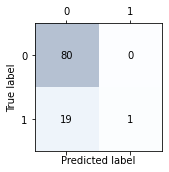

In [16]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

Calculate Accuracy, Precision, Recall, and F1. Note that python uses (0,0) is the False Positives and (1,1) are the True Positives.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy : %.3f' % accuracy_score(y_true=y_true, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_true, y_pred=y_pred))
print('Recall   : %.3f' % recall_score(y_true=y_true, y_pred=y_pred,average='binary'))
print('F1       : %.3f' % f1_score(y_true=y_true, y_pred=y_pred))

Accuracy : 0.810
Precision: 1.000
Recall   : 0.050
F1       : 0.095


In [18]:
cm = confusion_matrix(y_true,y_pred)
print('Overall Macro Precision: {0}%'.format(np.round(precision_macro_average(cm)*100,2)))
print('Overall Macro Recall   : {0}%'.format(np.round(recall_macro_average(cm)*100,2)))
print('Overall F1-Score       : {0}'.format(np.round(f1score(cm),2)))

Overall Macro Precision: 90.4%
Overall Macro Recall   : 52.5%
Overall F1-Score       : 0.66


In [19]:
for i, label in enumerate(class_labels):
  print('{0}\t precision: {1}%, recall: {2}%, f1: {3}'.format(label,np.round(precision(i,cm)*100,0),np.round(recall(i,cm)*100,0),np.round(f1score(cm),2)))

cat	 precision: 81.0%, recall: 100.0%, f1: 0.66
dog	 precision: 100.0%, recall: 5.0%, f1: 0.66


Calculate the Informedness

In [20]:
cm = confusion_matrix(y_true,y_pred)
print(cm)

TN = cm[1][1]
FN = cm[0][1]
TP = cm[0][0]
FP = cm[1][0]

print('TN: {}, FN: {}, TP: {}, FP: {}'.format(TN,FN,TP,FP))

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy     : {:.2f}'.format(ACC))
print('Precision    : {:.2f}'.format(PPV))
print('Recall       : {:.2f}'.format(TPR))
F1 = 2*(PPV*TPR)/(PPV+TPR)
print('F1           : {:.2f}'.format(F1))
BM = TPR + TNR - 1
print('Informedness : {:.2f}'.format(BM))



[[80  0]
 [19  1]]
TN: 1, FN: 0, TP: 80, FP: 19
Accuracy     : 0.81
Precision    : 0.81
Recall       : 1.00
F1           : 0.89
Informedness : 0.05


The informedness ranges over [-1 1] with 0 guessing, 1 perfectly correct and -1 perfectly incorrect.

A value of 0.05 is close to 0, that is just guessing!  The is despite high scores for accuracy, precision, recall, and the F1 score!!!